### 커피 전문점과의 상관관계 분석

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import scipy.stats as spst
import warnings
warnings.filterwarnings('ignore')
plt.rc('font', family='Malgun Gothic') # 한글 깨짐

In [4]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [5]:
bus = pd.read_csv('1_bus_data.csv')
moving = pd.read_csv('2_seoul_moving.csv')
ppl = pd.read_csv('3_seoul_ppl.csv')
coffee = pd.read_csv('4_seoul_coffee.csv')

In [6]:
# 버스 정류장 데이터
print(bus.head())

# 유동인구 데이터
print(moving.head())

# 구별 등록 인구 데이터
print(ppl.head())

# 구별 커피전문점 데이터
print(coffee.head())


   자치구  정류장수  노선수   승차총승객수   하차총승객수
0  강남구   499   91  8030483  7569213
1  강동구   369   21  2890053  2830506
2  강북구   413   67  4825181  4671783
3  강서구   566   49  4681083  4652828
4  관악구   466   86  7655819  7792476
   도착 시군구 코드  평균 이동 시간(분)      이동인구(합)
0      11010      9356120  19385709.60
1      11020      9306020  19715322.61
2      11030      8514380  14707082.87
3      11040      8887140  17449273.95
4      11050      8625540  17947278.99
   자치구      인구      세대  세대당인구  65세이상고령자
0  종로구  153684   73766   1.96     28064
1   중구  131450   63767   1.92     24742
2  용산구  236518  111207   2.00     39461
3  성동구  291609  134533   2.12     46896
4  광진구  353110  169483   2.01     52604
   자치구  커피전문점 사업체수  커피전문점 종사자수
0  종로구         948        3613
1   중구         869        3542
2  용산구         634        2076
3  성동구         547        1859
4  광진구         590        1887


In [7]:
seoul = pd.merge(standard,bus,on='자치구')
seoul = pd.merge(seoul,moving,on='도착 시군구 코드')
seoul = pd.merge(seoul,ppl,on='자치구')
seoul = pd.merge(seoul,coffee,on='자치구')

seoul

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,평균 이동 시간(분),이동인구(합),인구,세대,세대당인구,65세이상고령자,커피전문점 사업체수,커피전문점 종사자수
0,11010,종로구,349,106,5468935,5205394,9356120,19385709.60,153684,73766,1.96,28064,948,3613
1,11020,중구,178,103,3776675,3598932,9306020,19715322.61,131450,63767,1.92,24742,869,3542
2,11030,용산구,323,67,4189977,4086474,8514380,14707082.87,236518,111207,2.00,39461,634,2076
3,11040,성동구,435,58,2807280,2746738,8887140,17449273.95,291609,134533,2.12,46896,547,1859
4,11050,광진구,269,41,2749448,2753411,8625540,17947278.99,353110,169483,2.01,52604,590,1887
5,11060,동대문구,306,73,5240565,5115379,8838130,16288077.28,352592,169695,1.99,62963,494,1472
6,11070,중랑구,380,48,3792541,3740923,7939300,13907465.59,393600,187693,2.07,72851,381,1037
7,11080,성북구,602,99,6236424,6231238,9072420,18757182.35,442680,197296,2.20,75719,457,1384
8,11090,강북구,413,67,4825181,4671783,7649610,12570412.30,300824,144725,2.05,64961,358,1095
9,11100,도봉구,359,46,3304305,3211421,6995880,10821566.75,318100,138836,2.28,65122,288,837


In [9]:
seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   도착 시군구 코드    25 non-null     int64  
 1   자치구          25 non-null     object 
 2   정류장수         25 non-null     int64  
 3   노선수          25 non-null     int64  
 4   승차총승객수       25 non-null     int64  
 5   하차총승객수       25 non-null     int64  
 6   평균 이동 시간(분)  25 non-null     int64  
 7   이동인구(합)      25 non-null     float64
 8   인구           25 non-null     int64  
 9   세대           25 non-null     int64  
 10  세대당인구        25 non-null     float64
 11  65세이상고령자     25 non-null     int64  
 12  커피전문점 사업체수   25 non-null     int64  
 13  커피전문점 종사자수   25 non-null     int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 2.9+ KB


In [10]:
seoul.corr()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,평균 이동 시간(분),이동인구(합),인구,세대,세대당인구,65세이상고령자,커피전문점 사업체수,커피전문점 종사자수
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.235541,0.473119,0.687074,0.661483,0.348330,0.589508,0.254269,0.267956
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,0.356947,0.355635,0.566615,0.554665,0.315087,0.554425,0.240643,0.209808
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.388332,0.226437,-0.281536,-0.241699,-0.295018,-0.334297,0.395274,0.425180
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.581339,0.576553,0.364433,0.408783,-0.015831,0.295889,0.488169,0.530386
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.572769,0.558699,0.388119,0.443088,-0.039725,0.322254,0.457139,0.494266
평균 이동 시간(분),0.235541,0.356947,0.388332,0.581339,0.572769,1.000000,0.923298,0.373570,0.344073,0.134222,0.186226,0.836271,0.835772
이동인구(합),0.473119,0.355635,0.226437,0.576553,0.558699,0.923298,1.000000,0.528251,0.465023,0.320777,0.336376,0.854651,0.873656
인구,0.687074,0.566615,-0.281536,0.364433,0.388119,0.373570,0.528251,1.000000,0.967531,0.481283,0.951353,0.169566,0.150638
세대,0.661483,0.554665,-0.241699,0.408783,0.443088,0.344073,0.465023,0.967531,1.000000,0.259446,0.926624,0.144036,0.121106
세대당인구,0.348330,0.315087,-0.295018,-0.015831,-0.039725,0.134222,0.320777,0.481283,0.259446,1.000000,0.465062,0.049522,0.061676


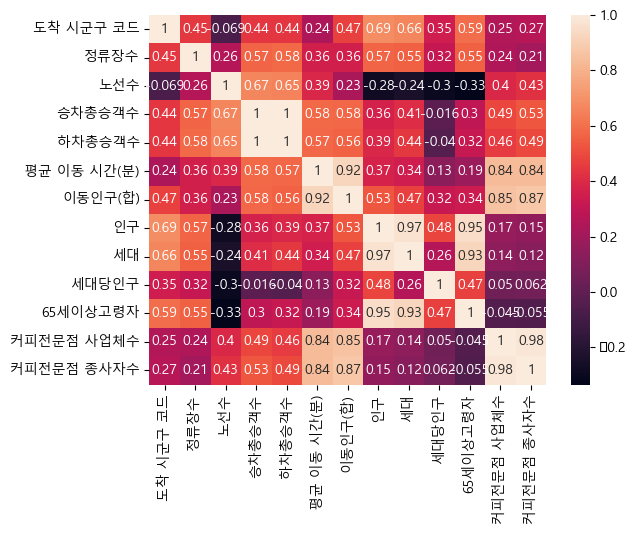

In [11]:
sns.heatmap(seoul.corr(), annot = True)
plt.show()

In [69]:
def corrPlot(var1, target1):
#     sns.scatterplot(x=var1, y = target1, data = seoul)
    sns.regplot(x=var1, y=target1, data=seoul)  
    plt.title(f'{var1} 와(과) {target1} 의 상관관계')
    plt.show()
    
    result = spst.pearsonr(seoul[var1], seoul[target1])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')

## 1. 커피전문점 사업체수 & 종사자수 - 승하차총승객수 상관관계
- 0.5 전후의 상관관계

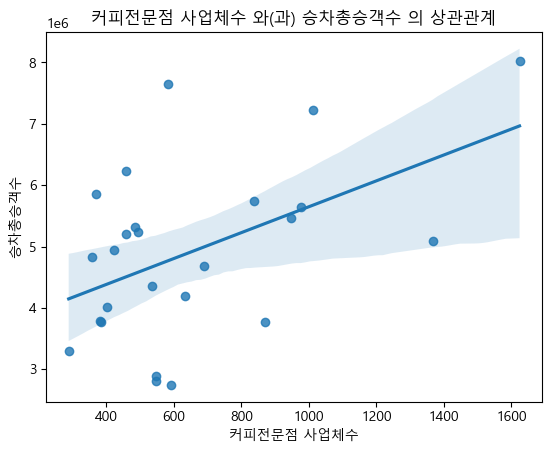

상관계수 : 0.4881692366349319, p-value : 0.013295050925791798


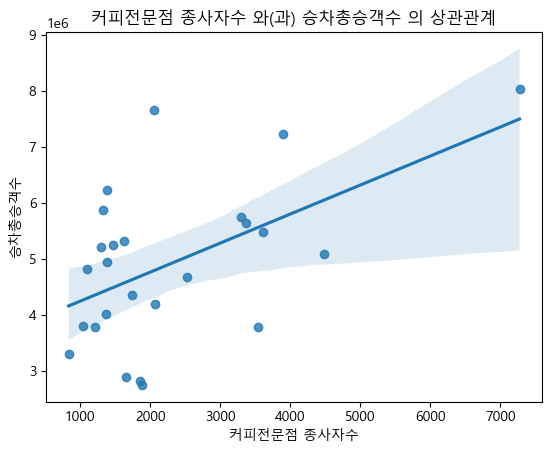

상관계수 : 0.5303859652398508, p-value : 0.006383736312117321


In [75]:
corrPlot('커피전문점 사업체수', '승차총승객수')
corrPlot('커피전문점 종사자수', '승차총승객수')

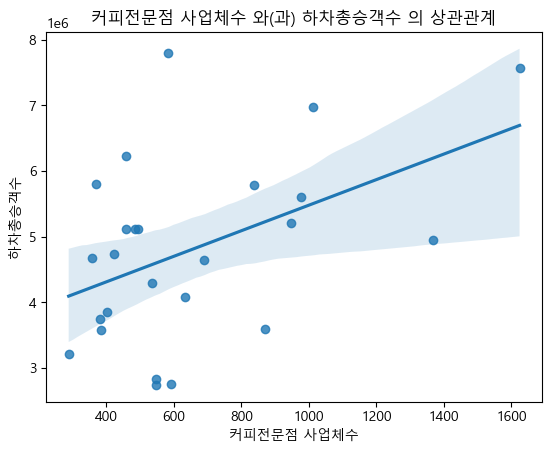

상관계수 : 0.4571394442668359, p-value : 0.021593978868975967


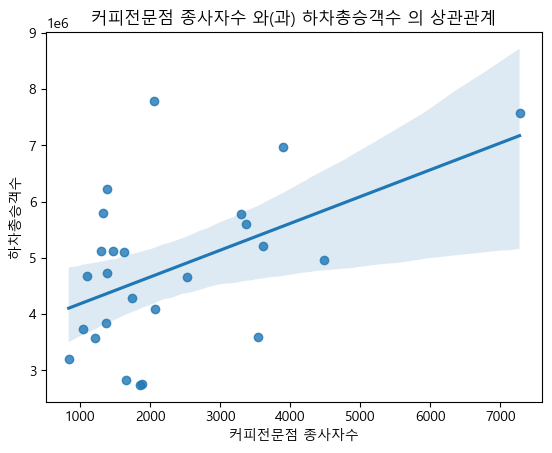

상관계수 : 0.4942655091300091, p-value : 0.012024441735292326


In [76]:
corrPlot('커피전문점 사업체수', '하차총승객수')
corrPlot('커피전문점 종사자수', '하차총승객수')

## 2. 커피전문점 사업체수 & 종사자수 - 평균 이동 시간(분) 상관관계
- 0.8 정도의 상관관계

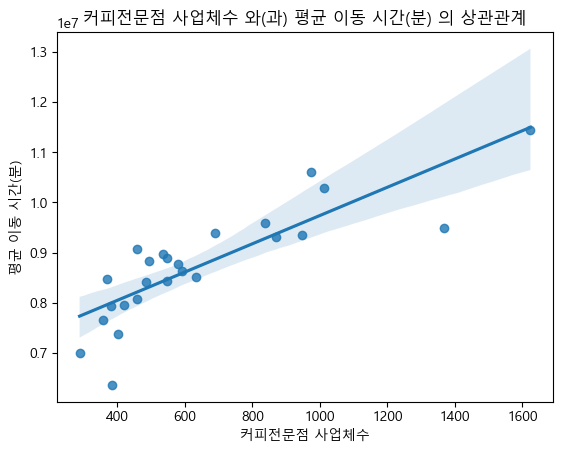

상관계수 : 0.836271130797342, p-value : 1.92543519525677e-07


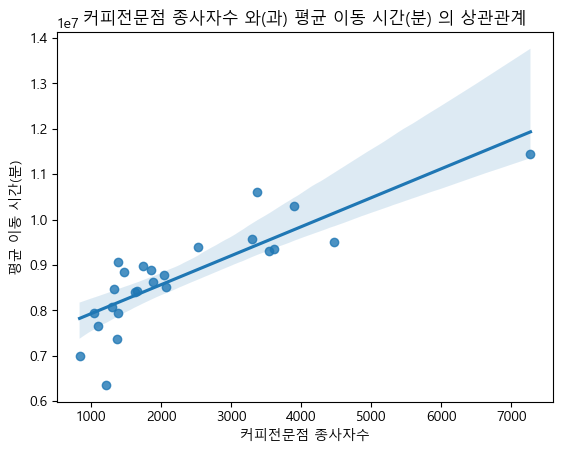

상관계수 : 0.8357724842802066, p-value : 1.988802094603936e-07


In [77]:
corrPlot('커피전문점 사업체수', '평균 이동 시간(분)')
corrPlot('커피전문점 종사자수', '평균 이동 시간(분)')

## 3. 커피전문점 사업체수 & 종사자수 - 이동인구(합) 상관관계
- 0.8 정도의 상관관계

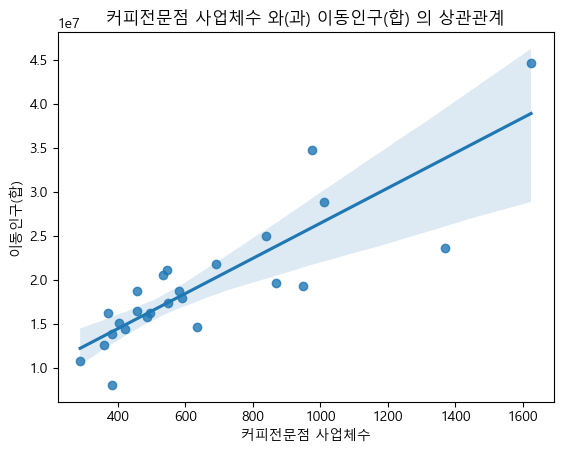

상관계수 : 0.8546507402767236, p-value : 5.384215881994175e-08


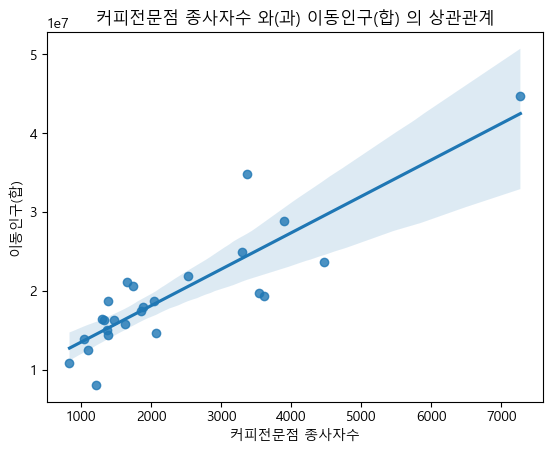

상관계수 : 0.8736562838487263, p-value : 1.184607858712529e-08


In [78]:
corrPlot('커피전문점 사업체수', '이동인구(합)')
corrPlot('커피전문점 종사자수', '이동인구(합)')

## 4. (1) 커피전문점 사업체수 & 종사자수 상관관계 - 노선수
- 0.4 정도의 상관관계

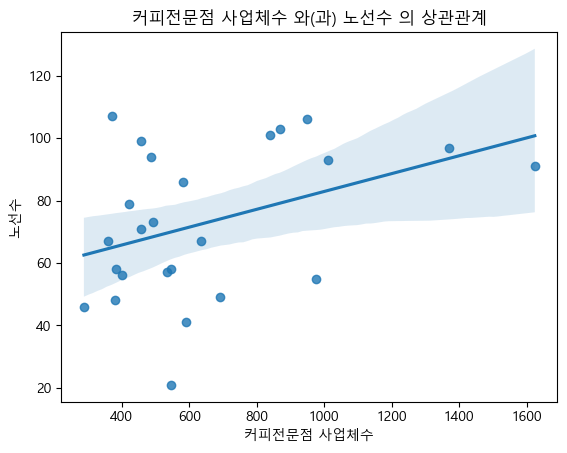

상관계수 : 0.39527392470061734, p-value : 0.05050405934174307


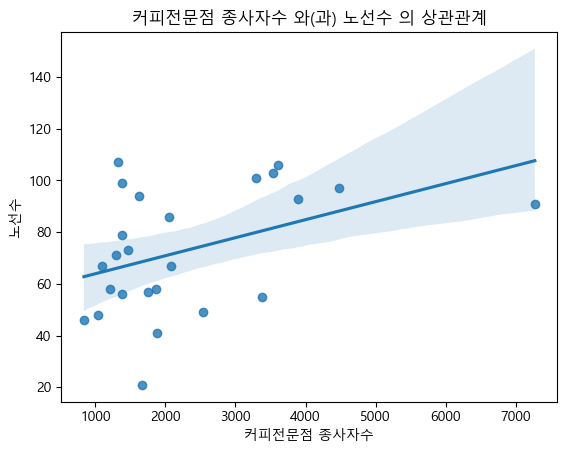

상관계수 : 0.42518048108643286, p-value : 0.03410811239601253


In [82]:
corrPlot('커피전문점 사업체수','노선수')
corrPlot('커피전문점 종사자수','노선수')

## 4. (2) 커피전문점 사업체수 & 종사자수 상관관계 - 정류장수
- 유의미한 상관관계 x

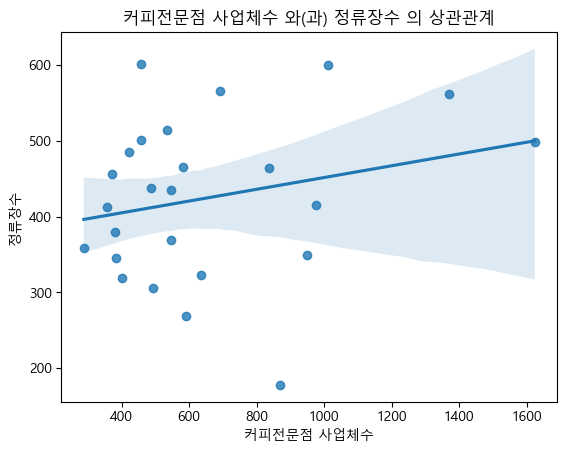

상관계수 : 0.24064271378327762, p-value : 0.24656211167736675


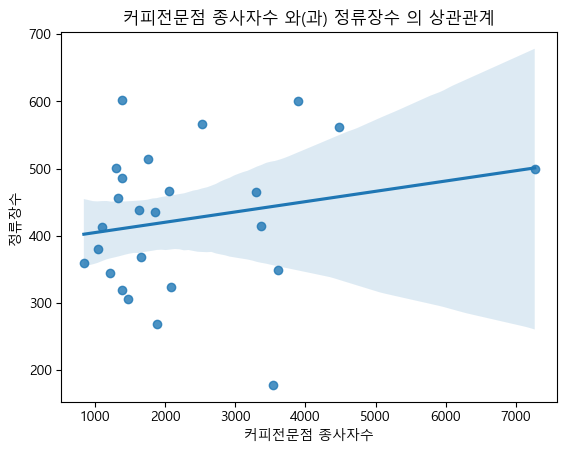

상관계수 : 0.20980792269322665, p-value : 0.3141301127923003


In [81]:
corrPlot('커피전문점 사업체수','정류장수')
corrPlot('커피전문점 종사자수','정류장수')

## 5. 분석 결과
+ [커피전문점 사업체수 및 종사자 수]와 [승하차 승객수]의 각각 0.48, 0.53 정도의 양의 상관관계(p-value 0.02 이하)
+ [커피전문점 사업체수 및 종사자 수]와 [평균 이동시간 및 이동인구의 수] 양의 상관관계 (0.8 이상의 높은 상관관계와 아주 작은 p-value).


+ 이에 따라 커피전문점 사업체 수와 종사자의 수가 많을 수록 그곳으로 향하는 유동인구가 많을 것이라고 생각됨
+ 해당 사업체가 많고, 해당 사업체에 종사하는 사람이 많은 지역에 노선 및 정류장을 추가해야 하지 않을까? 

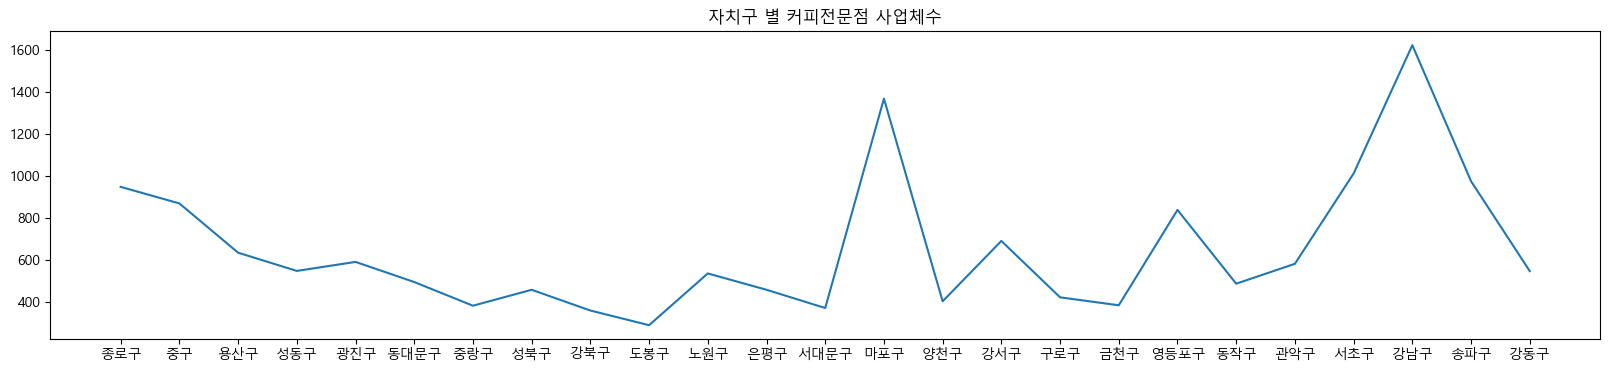

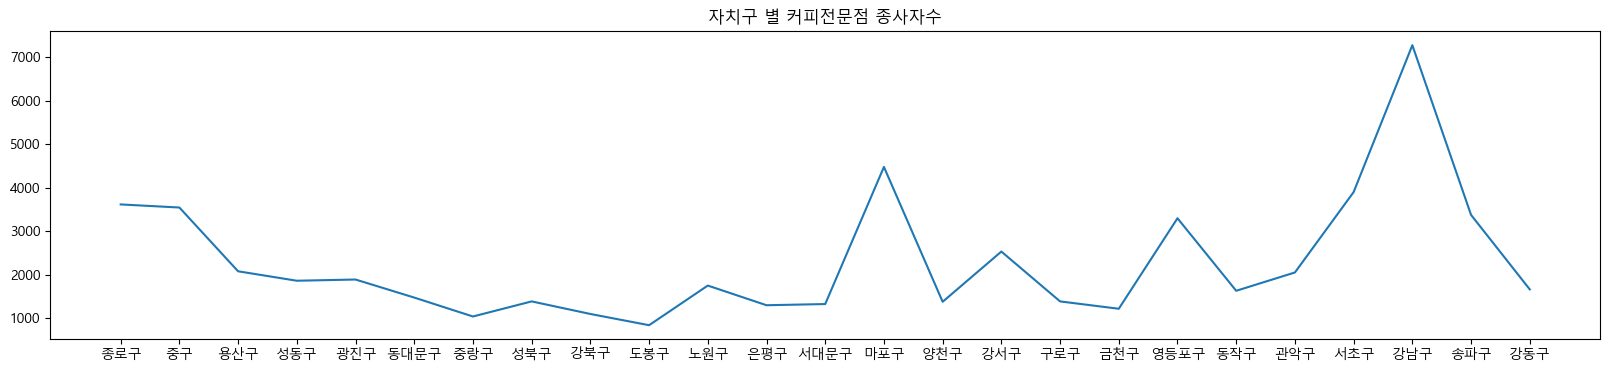

In [91]:
plt.figure(figsize=(20,4))
plt.title('자치구 별 커피전문점 사업체수')
plt.plot('자치구', '커피전문점 사업체수', data=seoul)
plt.show()

plt.figure(figsize=(20,4))
plt.title('자치구 별 커피전문점 종사자수')
plt.plot('자치구', '커피전문점 종사자수', data=seoul)
plt.show()

### 커피 전문점 사업체수 & 종사자 수가 높은 top3 자치구 : 강남구, 마포구, 영등포구

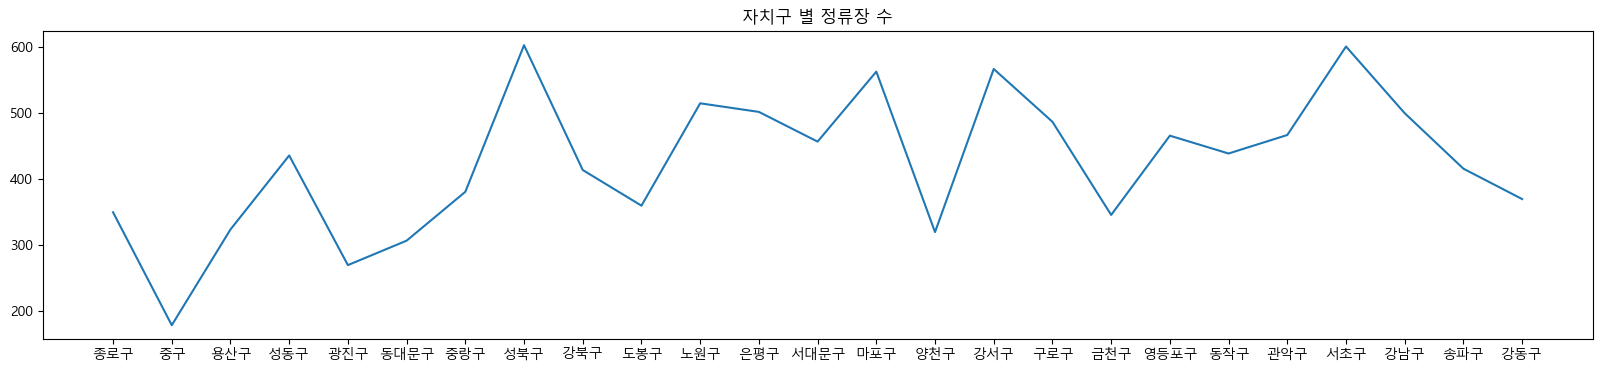

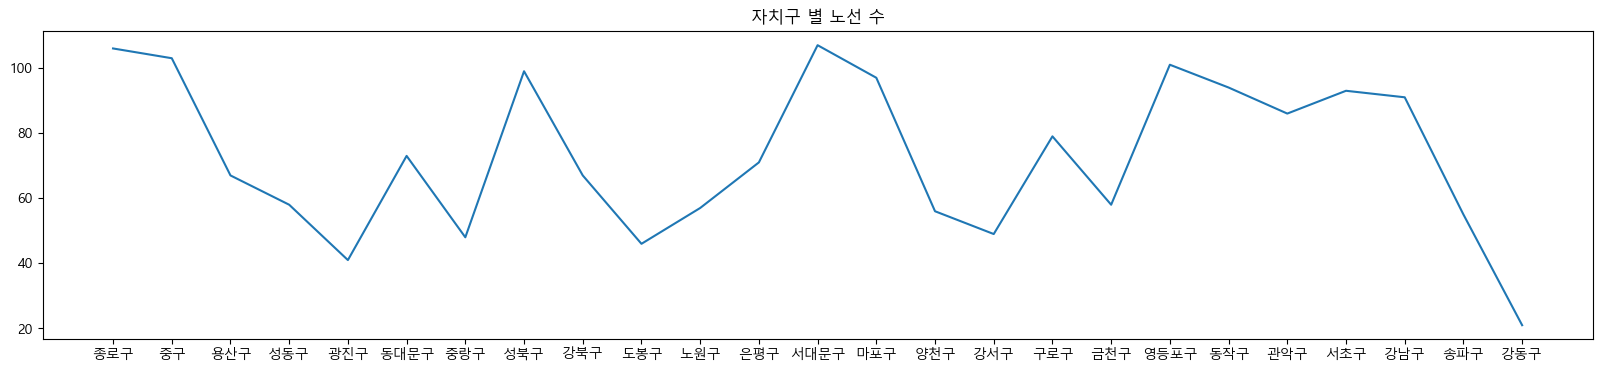

In [93]:
plt.figure(figsize=(20,4))
plt.title('자치구 별 정류장 수')
plt.plot('자치구', '정류장수', data=seoul)
plt.show()

plt.figure(figsize=(20,4))
plt.title('자치구 별 노선 수')
plt.plot('자치구', '노선수', data=seoul)
plt.show()

In [113]:
seoul.describe()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,평균 이동 시간(분),이동인구(합),인구,세대,세대당인구,65세이상고령자,커피전문점 사업체수,커피전문점 종사자수
count,25.000000,25.000000,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,11130.000000,424.600000,72.920000,4.912037e+06,4.800701e+06,8.752278e+06,1.948448e+07,389304.680000,178057.760000,2.121600,65159.200000,650.200000,2292.880000
std,73.598007,106.279506,23.808122,1.421263e+06,1.400538e+06,1.109894e+06,7.687836e+06,126085.700172,56246.286878,0.168218,19280.183408,328.970237,1452.869383
min,11010.000000,178.000000,21.000000,2.749448e+06,2.746738e+06,6.362000e+06,8.111344e+06,131450.000000,63767.000000,1.740000,24742.000000,288.000000,837.000000
25%,11070.000000,349.000000,56.000000,3.792541e+06,3.740923e+06,8.077520e+06,1.506964e+07,317075.000000,144725.000000,2.000000,55012.000000,421.000000,1375.000000
50%,11130.000000,435.000000,71.000000,4.942197e+06,4.730992e+06,8.772170e+06,1.794728e+07,394649.000000,181765.000000,2.100000,65122.000000,546.000000,1748.000000
75%,11190.000000,499.000000,94.000000,5.641742e+06,5.603488e+06,9.356120e+06,2.110146e+07,465097.000000,201926.000000,2.270000,75719.000000,838.000000,3295.000000
max,11250.000000,602.000000,107.000000,8.030483e+06,7.792476e+06,1.143756e+07,4.468465e+07,668261.000000,285106.000000,2.450000,99854.000000,1624.000000,7273.000000


# 1. 중구

+ 커피전문점 종사자수와 정류장 수 모두 높은 서초구와 마포구 : 종사자수 3000~4000명, 정류장 수 600개  
+ 이에 반해 중구의 경우 커피전문점 종사자수가 3500명에 달하는 데도 불구하고 정류장 수가 178개로 적은 상황임. 


=> 중구에 추가 정류장이 필요해 보임

In [109]:
seoul.sort_values(by=["정류장수"], ascending=[True]).head(5)

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,평균 이동 시간(분),이동인구(합),인구,세대,세대당인구,65세이상고령자,커피전문점 사업체수,커피전문점 종사자수
1,11020,중구,178,103,3776675,3598932,9306020,19715322.61,131450,63767,1.92,24742,869,3542
4,11050,광진구,269,41,2749448,2753411,8625540,17947278.99,353110,169483,2.01,52604,590,1887
5,11060,동대문구,306,73,5240565,5115379,8838130,16288077.28,352592,169695,1.99,62963,494,1472
14,11150,양천구,319,56,4009172,3851173,7379950,15069643.56,449378,181765,2.45,69953,402,1375
2,11030,용산구,323,67,4189977,4086474,8514380,14707082.87,236518,111207,2.00,39461,634,2076


# 2. 강남구
+ 강남구의 경우 커피전문점 종사자수가 7000명으로, 중위수 약 1700 평균 약 2300에 비해 매우 큰 상황
+ 그러나 정류장 수의 경우 중위수와 평균 420~430 보다 조금 더 많은 상황임

=> 따라서 커피전문점 종사자가 많은 즉, 유동인구가 많은 강남구에 보다 정류장 추가 증설이 필요한 것으로 보임!

In [111]:
seoul.sort_values(by=["커피전문점 종사자수"], ascending=[False]).head(5)

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,평균 이동 시간(분),이동인구(합),인구,세대,세대당인구,65세이상고령자,커피전문점 사업체수,커피전문점 종사자수
22,11230,강남구,499,91,8030483,7569213,11437560,44684651.43,537338,234612,2.27,79575,1624,7273
13,11140,마포구,562,97,5088461,4957596,9494790,23639807.30,378629,180702,2.04,55168,1369,4475
21,11220,서초구,600,93,7221330,6977950,10291660,28911318.58,413677,169895,2.41,61404,1012,3897
0,11010,종로구,349,106,5468935,5205394,9356120,19385709.60,153684,73766,1.96,28064,948,3613
1,11020,중구,178,103,3776675,3598932,9306020,19715322.61,131450,63767,1.92,24742,869,3542
